In [386]:
import pandas as pd
import plotly.express as px
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [285]:
df_user = pd.read_csv(r'../Data/takehome_users.csv',engine='python')
df_eng = pd.read_csv(r'../Data/takehome_user_engagement.csv',engine='python')

In [286]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


We will first look at how users have signed up for the product.This will potentially give us what channels might be effective for user signup

In [287]:
fig = px.pie(df_user,names=df_user.creation_source)
fig.show()

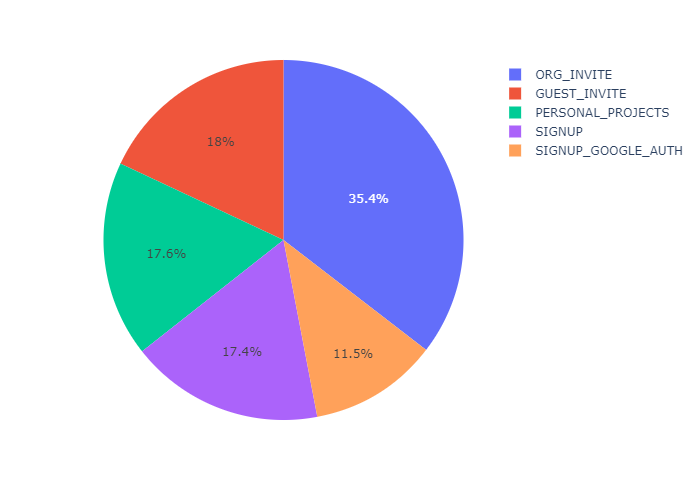

In [288]:
#code to reproduce plot for non dynamic render.
fig.write_image(r"../Images/creation_source.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Based on the data we could see that most signups are thorugh Org invites. Infact % wise its almost double
the amount to guest invite which hold the 2nd highest signups.This could mean that higher number of users
stem from companies who have subscribed to the software.

In [289]:
df_user.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [290]:
df_user.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

The numbers show less number of users opting for marketing materials.This could that majority users are
enterprise users who use it for work and not at a personal level. Lets find out.

In [291]:
df_user.groupby(['creation_source','opted_in_to_mailing_list']).count()

object_id  creation_time  name  \
creation_source    opted_in_to_mailing_list                                   
GUEST_INVITE       0                              1622           1622  1622   
                   1                               541            541   541   
ORG_INVITE         0                              3176           3176  3176   
                   1                              1078           1078  1078   
PERSONAL_PROJECTS  0                              1599           1599  1599   
                   1                               512            512   512   
SIGNUP             0                              1562           1562  1562   
                   1                               525            525   525   
SIGNUP_GOOGLE_AUTH 0                              1047           1047  1047   
                   1                               338            338   338   

                                             email  \
creation_source    opted_in_to_mailing_list          
GUEST_INVITE       0                          1622   
                   1                           541   
ORG_INVITE         0                          3176   
                   1                          1078   
PERSONAL_PROJECTS  0                          1599   
                   1                           512   
SIGNUP             0                          1562   
                   1                           525   
SIGNUP_GOOGLE_AUTH 0                          1047   
                   1                           338   

                                             last_session_creation_time  \
creation_source    opted_in_to_mailing_list                               
GUEST_INVITE       0                                               1195   
                   1                                                393   
ORG_INVITE         0                                               2363   
                   1                                                825   
PERSONAL_PROJECTS  0                                                577   
                   1                                                187   
SIGNUP             0                                               1415   
                   1                                                483   
SIGNUP_GOOGLE_AUTH 0                                               1047   
                   1                                                338   

                                             enabled_for_marketing_drip  \
creation_source    opted_in_to_mailing_list                               
GUEST_INVITE       0                                               1622   
                   1                                                541   
ORG_INVITE         0                                               3176   
                   1                                               1078   
PERSONAL_PROJECTS  0                                               1599   
                   1                                                512   
SIGNUP             0                                               1562   
                   1                                                525   
SIGNUP_GOOGLE_AUTH 0                                               1047   
                   1                                                338   

                                             org_id  invited_by_user_id  
creation_source    opted_in_to_mailing_list                              
GUEST_INVITE       0                           1622                1622  
                   1                            541                 541  
ORG_INVITE         0                           3176                3176  
                   1                           1078                1078  
PERSONAL_PROJECTS  0                           1599                   0  
                   1                            512                   0  
SIGNUP             0                           1562  

In [292]:
df_user.groupby(['creation_source','enabled_for_marketing_drip']).count()

object_id  creation_time  name  \
creation_source    enabled_for_marketing_drip                                   
GUEST_INVITE       0                                1844           1844  1844   
                   1                                 319            319   319   
ORG_INVITE         0                                3610           3610  3610   
                   1                                 644            644   644   
PERSONAL_PROJECTS  0                                1808           1808  1808   
                   1                                 303            303   303   
SIGNUP             0                                1768           1768  1768   
                   1                                 319            319   319   
SIGNUP_GOOGLE_AUTH 0                                1178           1178  1178   
                   1                                 207            207   207   

                                               email  \
creation_source    enabled_for_marketing_drip          
GUEST_INVITE       0                            1844   
                   1                             319   
ORG_INVITE         0                            3610   
                   1                             644   
PERSONAL_PROJECTS  0                            1808   
                   1                             303   
SIGNUP             0                            1768   
                   1                             319   
SIGNUP_GOOGLE_AUTH 0                            1178   
                   1                             207   

                                               last_session_creation_time  \
creation_source    enabled_for_marketing_drip                               
GUEST_INVITE       0                                                 1356   
                   1                                                  232   
ORG_INVITE         0                                                 2689   
                   1                                                  499   
PERSONAL_PROJECTS  0                                                  664   
                   1                                                  100   
SIGNUP             0                                                 1595   
                   1                                                  303   
SIGNUP_GOOGLE_AUTH 0                                                 1178   
                   1                                                  207   

                                               opted_in_to_mailing_list  \
creation_source    enabled_for_marketing_drip                             
GUEST_INVITE       0                                               1844   
                   1                                                319   
ORG_INVITE         0                                               3610   
                   1                                                644   
PERSONAL_PROJECTS  0                                               1808   
                   1                                                303   
SIGNUP             0                                               1768   
                   1                                                319   
SIGNUP_GOOGLE_AUTH 0                                               1178   
                   1                                                207   

                                               org_id  invited_by_user_id  
creation_source    enabled_for_marketing_drip                              
GUEST_INVITE       0                             1844                1844  
                   1                              319                 319  
ORG_INVITE         0                             3610                3610  
                   1                              644                 644  
PERSONAL_PROJECTS  0                             1808                   0  
                   1                       

surprisingly most users who have opted for marketing mails are from Org invites with all other categories
having lower numbers.Also, people who are enabled for marketing drip are also moslty from Org invites

We will convert last session date to human readable datetime format

In [293]:
df_user['last_session_creation_time']= pd.to_datetime(df_user.last_session_creation_time,unit='s')
df_user['creation_time'] = df_user['creation_time'].astype('datetime64[ns]')

Then map creation source with numerical values

In [375]:
df_user['creation_source_val'] = df_user['creation_source'].map({'ORG_INVITE':0,'GUEST_INVITE':1,'PERSONAL_PROJECTS':2,'SIGNUP':3,'SIGNUP_GOOGLE_AUTH':4})

We will look at the user adoption and find whats drives users to adopt the software

In [294]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [295]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [296]:
#converting string value to datetime
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])

In [297]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [358]:
def adopted_user(usr):
    temp = df_eng[df_eng.loc[:,'user_id']==usr].resample('7D',on='time_stamp').aggregate(['count'])
    temp = len(temp[temp.loc[:,('time_stamp', 'count')]>2])
    if(temp>0):
        return 1
        print('True')
    else:
        return 0
        print('Flase')

In [362]:
df_user['adopted'] = 0

In [363]:
for i in range(len(df_user)):
    usr = df_user.object_id[i]
    df_user['adopted'][usr-1]  = adopted_user(usr)

C:\Users\kavin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Lets see what fraction of people have adopted the software

In [366]:
fig = px.pie(df_user,names=df_user.adopted.map({0:'not adopted',1:'adopted'}))
fig.show()

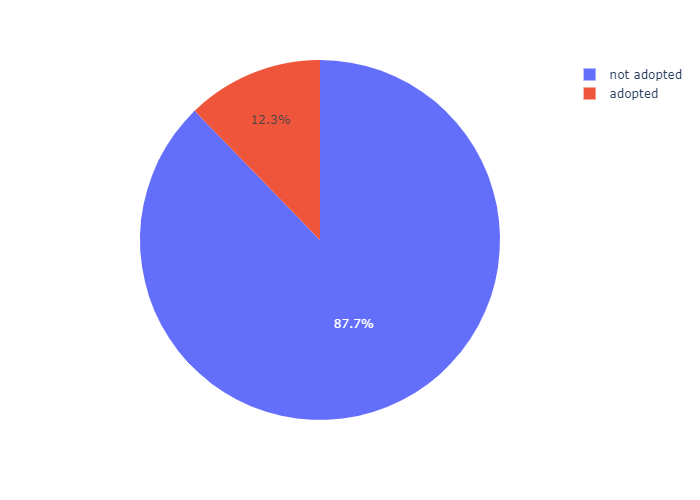

In [367]:
#code to reproduce plot for non dynamic render.
fig.write_image(r"../Images/adopted_pct.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Using ExtraTreesClasifier we will find out the top 5 important features

In [390]:
X_train,X_test,y_train,y_test = train_test_split(df_user.drop(['creation_time','name','email','creation_source','last_session_creation_time','adopted','invited_by_user_id','object_id'],axis=1),df_user.adopted,test_size=0.2,random_state=27)

In [391]:
etc = ExtraTreesClassifier(oob_score=True,random_state=27,bootstrap=True,n_estimators=15)
etc.fit(X_train,y_train)
columns = list(X_train.columns)
pd_feature = pd.DataFrame(data=[columns,etc.feature_importances_])
pd_feature = pd_feature.T
pd_feature.columns=['features','scores']
pd_feature.sort_values(['scores'],ascending=False)

C:\Users\kavin\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\kavin\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide



,features,scores
2,org_id,0.940561
3,creation_source_val,0.0443656
1,enabled_for_marketing_drip,0.00769459
0,opted_in_to_mailing_list,0.00737921


Although given the features its best to pass most features, from the above tablewe can see that feature like users from working
in organizations are more likely to adopt the software.